# 1. EDA and Cleaning

* [1.1 EDA and Analysis](#1.1-EDA-and-Analysis)
    * [1.1.1 Numerical Features](#1.1.1-Numerical-Features)
    * [1.1.2 Categorical Features](#1.1.2-Categorical-Features)
    
* [1.2 Data Cleaning](#1.2-Data-Cleaning)
    * [1.2.1 Outlier](#1.2.1-Outlier)
    * [1.2.2 Null Values](1.2.2-Null-Values)
    * [1.2.3 Encoding Remaining Categorical Features](#1.2.3-Encoding-Remaining-Categorical-Features)
    * [1.2.4 Saving Cleaned Dataset](#1.2.4-Saving-Cleaned-Dataset)

## 1.1 EDA and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from math import ceil
from itertools import zip_longest

import warnings
warnings.filterwarnings('ignore')

In [2]:
sample = pd.read_csv('../datasets/sample_sub_reg.csv') 
train = pd.read_csv('../datasets/train.csv') 
test = pd.read_csv('../datasets/test.csv') 

In [3]:
sample.head()

,Id,SalePrice
0,2,181479.1217
1,4,181479.1217
2,6,181479.1217
3,7,181479.1217
4,17,181479.1217


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [6]:
train.columns = train.columns.str.replace(' ', '')
test.columns = test.columns.str.replace(' ', '')

In [7]:
train.sort_values('Id').head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SalePrice
1080,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,215000
304,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,172000
574,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,189900
1673,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,191500
458,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,236500


In [8]:
test.sort_values('Id').head()

,Id,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType
703,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD
705,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2010,WD
119,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD
311,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2010,WD
400,17,527225035,50,RL,152.0,12134,Pave,NaN,IR1,Bnk,...,0,0,0,NaN,NaN,NaN,0,6,2010,WD


In [9]:
test.isnull().sum()

Id               0
PID              0
MSSubClass       0
MSZoning         0
LotFrontage    160
              ... 
MiscFeature    837
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
Length: 80, dtype: int64

In [10]:
train.isnull().sum()

Id               0
PID              0
MSSubClass       0
MSZoning         0
LotFrontage    330
              ... 
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SalePrice        0
Length: 81, dtype: int64

In [11]:
train.describe()

,Id,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


Street? Paved 1 gravel 0
Alley? Paved 1 gravel 0
Lot Shape? one hot encode
Land Contour? one hot encode
Utilities? one hot encode
LotConfig? one hot encode
remodeling? yes or no
BsmtFin SF 2? can drop?
CentralAir? change to binary
PavedDrive? Paved 1 gravel 0

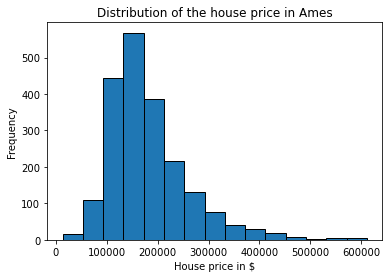

In [12]:
train['SalePrice'].plot.hist(bins=15, edgecolor="black")
plt.xlabel("House price in $")
_ = plt.title("Distribution of the house price in Ames")

In [13]:
num_data = train.select_dtypes("number")
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2051 non-null   int64  
 1   PID            2051 non-null   int64  
 2   MSSubClass     2051 non-null   int64  
 3   LotFrontage    1721 non-null   float64
 4   LotArea        2051 non-null   int64  
 5   OverallQual    2051 non-null   int64  
 6   OverallCond    2051 non-null   int64  
 7   YearBuilt      2051 non-null   int64  
 8   YearRemod/Add  2051 non-null   int64  
 9   MasVnrArea     2029 non-null   float64
 10  BsmtFinSF1     2050 non-null   float64
 11  BsmtFinSF2     2050 non-null   float64
 12  BsmtUnfSF      2050 non-null   float64
 13  TotalBsmtSF    2050 non-null   float64
 14  1stFlrSF       2051 non-null   int64  
 15  2ndFlrSF       2051 non-null   int64  
 16  LowQualFinSF   2051 non-null   int64  
 17  GrLivArea      2051 non-null   int64  
 18  BsmtFull

### 1.1.1 Numerical Features

Text(0.5, 0.92, 'Histogram of Numeric Features')

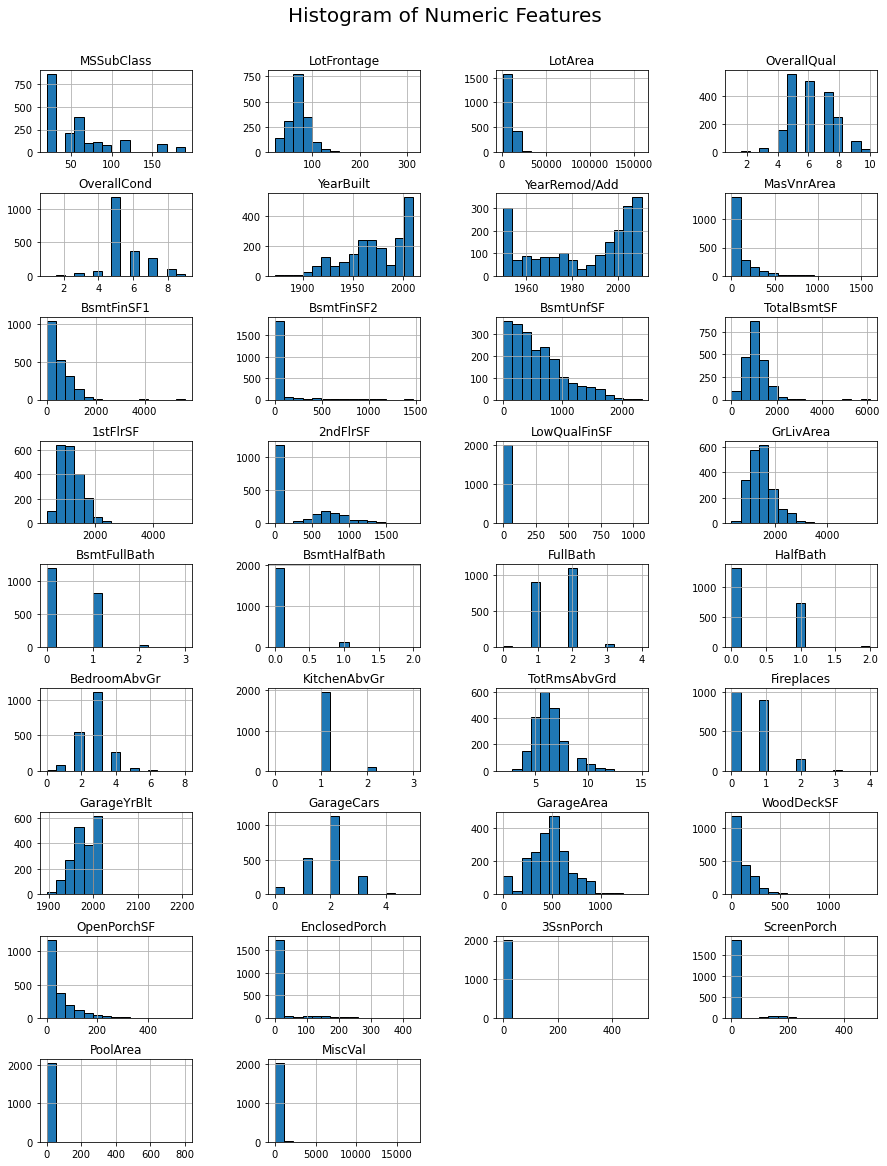

In [14]:
num_data.iloc[:,2:36].hist(bins=15, figsize=(15, 22), edgecolor="black",layout=(10, 4))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('Histogram of Numeric Features', fontsize=20,y=0.92)

In [15]:
num_data['KitchenAbvGr'].value_counts()

1    1960
2      88
0       2
3       1
Name: KitchenAbvGr, dtype: int64

Based on the initial analysis of the distributions, we can notice certain features from the training set are skewed.
- 'BsmtFinSF2': Second Basement finished area in square feet has 87.9% of the distribution that does not have second basement.
- 'LowQualFinSF': Low quality finished are in square feet (all floors) has 98.3% of the distribution that is 0 sqft
- 'BsmtHalfBath': Number of houses with half bathroom in the basement has 93.8% of the distribution with 0 half bathroom
- 'KitchenAbvGr': Number of kitchens has 95.6% of the distribution with 1 kitchen
- 'EnclosedPorch': Enclosed porch area in square feet has 84.1% of the distribution that does not have enclosed porch
- '3SsnPorch': Three season porch area in square feet has 98.7% of the distribution that does not have three season porch
- 'ScreenPorch': Screen porch area in square feet has 91.2% of the distribution that does not have screen season porch
- 'PoolArea': Pool area in square feet has 99.6% of the distribution that does not have a pool
- 'MiscVal': Value of miscellaneous feature has 96.8% of the distribution that have $0



Text(0.5, 1.015, 'Scatterplot of Numeric Features vs Sale Price')

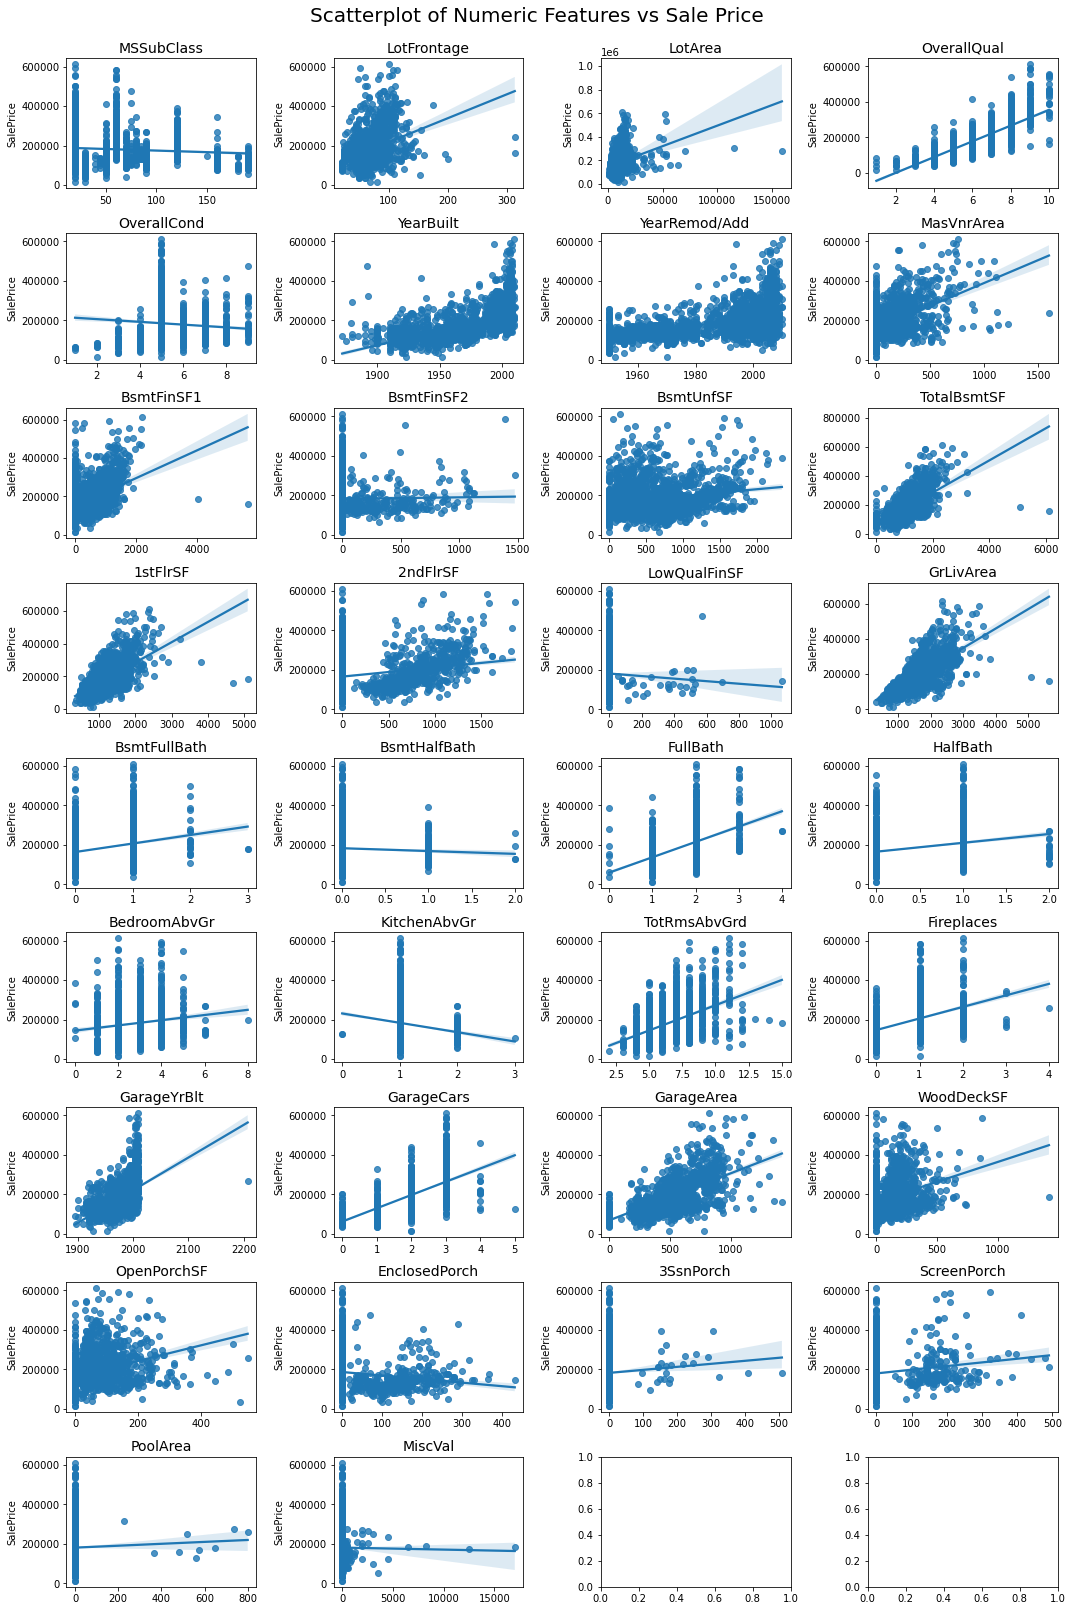

In [16]:
n_num_features = num_data.shape[1]
nrows, ncols = ceil((n_num_features - 3 )/ 4), 4

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(15, 22))
ax = ax.ravel()

for i, column in enumerate(num_data.columns[2:36]):    
    g = sns.regplot(data=num_data, x=column, y='SalePrice', ax=ax[i])
    ax[i].set_title(column, fontsize=14)
    ax[i].set_xlabel('')
    plt.tight_layout()

plt.suptitle('Scatterplot of Numeric Features vs Sale Price', fontsize=20, y=1.015)

From the Scatter plots, we can notice that some features have a positive relationship with Sale Price:
- 'OverallQual': Overall material and finish quality, ranging from 1 to 10. 10 being very excellent. The better the rating the higher the price of the house sold
- 'YearBuilt': The original construction date of the house. There seems to be a slight positive relationship with sale price. Though not as strong but it should be included in the model.
- 'YearRemod/Add': Remodel date. It seem to be similar to YearBuilt. Will combine these two features into 1, either boolean or replacing year built.
- 'GarageYrBlt': Year garage was built. There is one obvious error recorded the house was built in 2200.

Some other features that have positive relationship with Sale Price:
- 'MasVnrArea': Masonry veneer area in square feet.
- 'BsmtFinSF1': First basement finished area in square feet
- 'TotalBsmtSF': Total square feet of basement area
- '1stFlrSF': First floor in square feet
- 'GrLivArea': Above grade/ground living area in square feet
- 'FullBath': Full bathrooms above grade/ground
- 'BedroomAbvGr': Number of bedrooms above basement level
- 'TotRmsAbvGrd': Total rooms above grade/ground (does not include bathrooms)
- 'Fireplaces': Number of fireplaces
- 'GarageYrBlt': Year garage was built. There is one obvious error recorded the house was built in 2200.
- 'GarageCars': Size of garage in car capacity
- 'GarageArea': Size of garage in square feet
- 'WoodDeckSF': Wood deck area in square feet
- 'OpenPorchSF': Open porch area in square feet

After analysing both histogram and scatter plot, certain feature can be combine together as one variable:
- 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF': could be combine as single basement feature
- '1stFlrSF', '2ndFlrSF', 'GrLivArea': can be combine similarly to basement
- 'FullBath', 'HalfBath': can be combine measuring HalfBath as 0.5
- 'BedroomAbvGr', 'TotRmsAbvGrd': use one of the feature as BedroomAbvGr is a subset of TotRmsAbvGrd
- 'GarageCars', 'GarageArea': are measuring the same variable but with different metric



In conclusion, the features to consider dropping can be 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch' and 'MiscVal'.

### 1.1.2 Categorical Features

In [17]:
cat_data = train.select_dtypes(object)

Text(0.5, 0.89, 'Categorical Features')

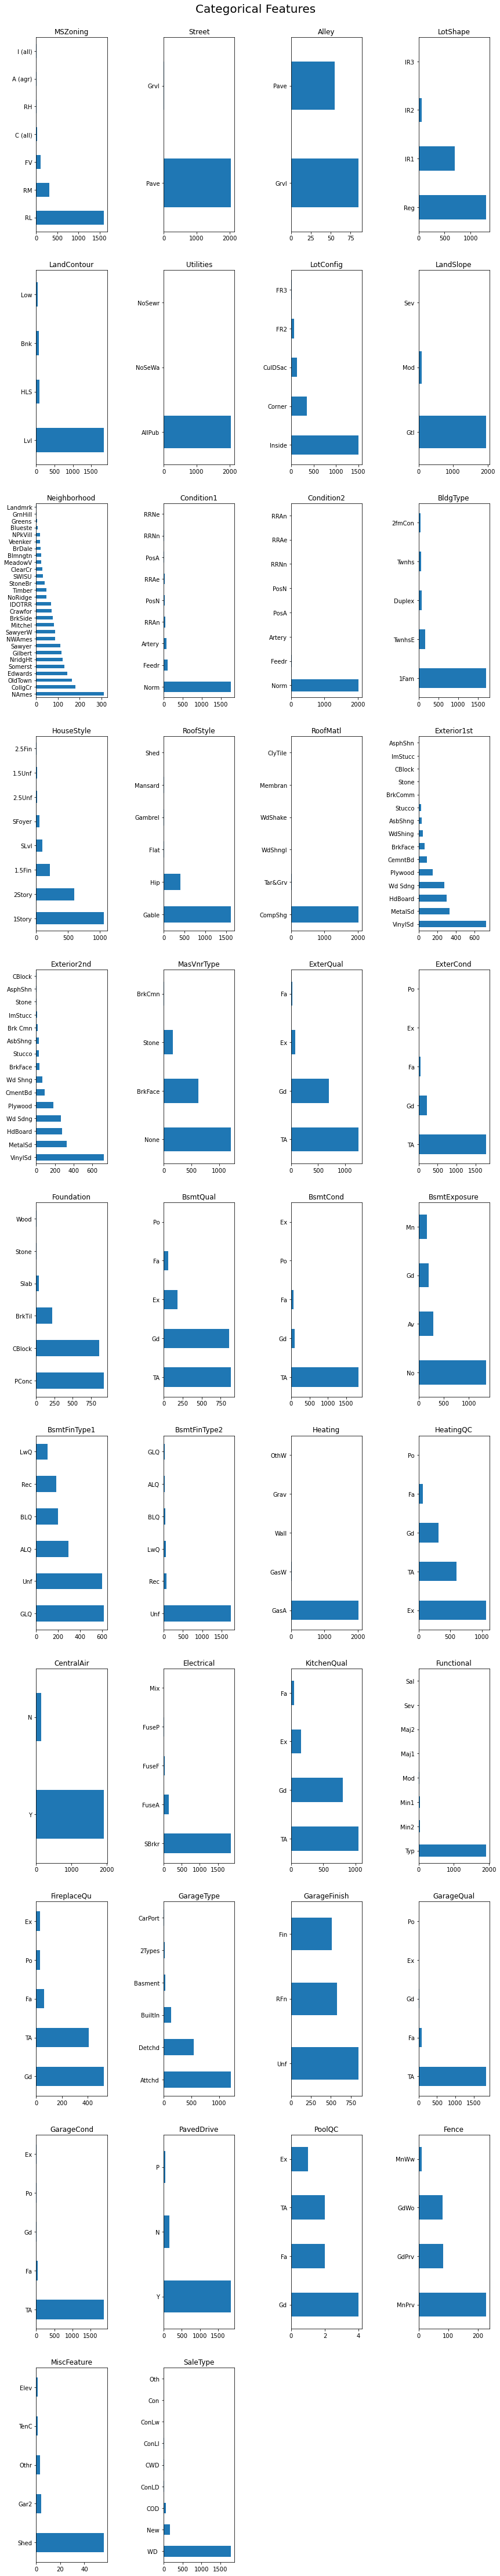

In [18]:
n_cat_features = cat_data.shape[1]
nrows, ncols = ceil(n_cat_features / 4), 4

fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, 80))

for feature_name, ax in zip_longest(cat_data, axs.ravel()):
    if feature_name is None:
        # do not show the axis
        ax.axis("off")
        continue

    cat_data[feature_name].value_counts().plot.barh(ax=ax)
    ax.set_title(feature_name)

plt.subplots_adjust(hspace=0.2, wspace=0.8)
plt.suptitle('Categorical Features', fontsize=20, y=0.89)

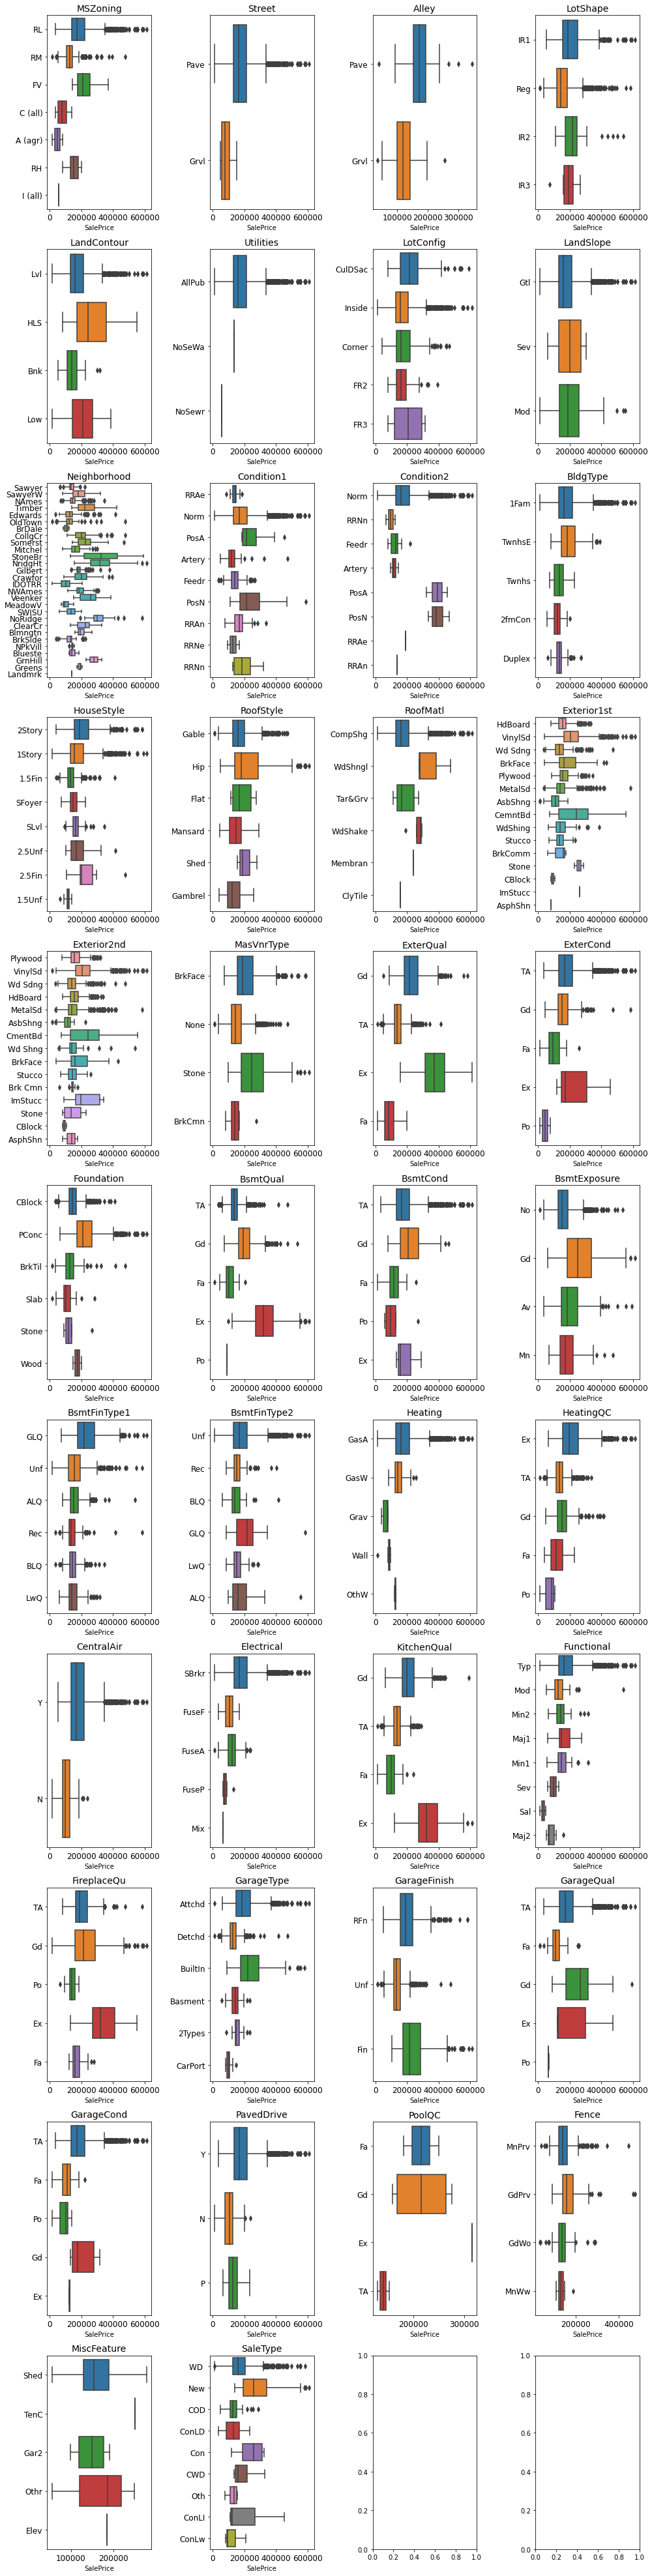

In [19]:
nrows, ncols = ceil(n_cat_features / 4), 4

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(14, nrows*5)) 
ax = ax.ravel() 

for i, column in enumerate(cat_data.columns): 
    sns.boxplot(x = num_data['SalePrice'], y=cat_data[column], ax=ax[i])
    ax[i].set_title(column,fontsize=14)  
    ax[i].tick_params(labelsize=12)
    ax[i].set_ylabel('')
    plt.tight_layout()

In [20]:
cat_data['BsmtCond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: BsmtCond, dtype: int64

In [21]:
cat_data['BsmtCond'].value_counts().transform(lambda x: x/x.sum())

TA    0.918838
Gd    0.044589
Fa    0.032565
Po    0.002505
Ex    0.001503
Name: BsmtCond, dtype: float64

Based on the initial analysis on the box plots, we notice the similar pattern with distribution charts. We can see that there are certain categorical features that have dominating variable, which may not have any effect in predicting sale price:

- 'Street': Type of road access to property has 99.7% of the road that are paved.
- 'LandContour': Flatness of the property has 89.9% of the property that are leveled.
- 'Utilities': Type of utilities available has 99.9% of the property that have all public utilities (E,G,W,& S).
- 'LandSlope': Type of slope the property is on has 95.2% of the property that are on gentle slope.
- 'Condition1': Property proximity to main road or railroad has 86.2% that are within normal proximity.
- 'Condition2': Property proximity to main road or railroad has 98.7% that are within normal proximity as well.
- 'RoofMatl': Roof material has 98.7% that uses standard (composite) shingle.
- 'ExterCond': Present condition of the material on the exterior has 86.7% that are in Average/Typical range.
- 'BsmtCond': General condition of the basement has 91.9% that are in Typical/Average range.
- 'BsmtFinType2': Quality of second finished area has 87.7% that are in unfinished state. Can review with 'BsmtFinType1' together to determine whether to drop. 
- 'Heating': Type of heating has 98.4% that are using gas forced warm air furnace.
- 'CentralAir': Central air conditioning has 93.1% that have central air conditioning.
- 'Electrical': Electrical system has 91.1% that have Standard Circuit Breakers & Romex.
- 'Functional': Home functionality rating has 93.4% that have typical functionality.
- 'GarageQual': Garage quality has 94.6% that are in Typical/Average range.
- 'GarageCond': Garage condition has 96.4% that are in Typical/Average range.
- 'PavedDrive': Paved driveway has 90.7% of the driveway that are in paved.
- 'PoolQC': Pool quality has 9 entries, which is not enought to accurately predict sales price as most houses does not have a pool. Can change to boolean and combine with 'PoolArea'
- 'MiscFeature': Miscellaneous feature not covered in other categories has 65 entries. Similar to PoolQC, we can do one-hot encoding for Elev, Shed, Gar2 and TenC
- 'SaleType': Type of sale has 86.8% that under Warrenty Deed - Conventional.




In conclusion, the features to consider dropping can be 'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'RoofMatl', 'ExterCond', 'BsmtCond', 'Heating', 'CentralAir', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive' and 'SaleType'.

## 1.2 Data Cleaning

### 1.2.1 Outlier

After analysis, we can move on to check initial outliers that we spotted from numerical values.
- LotFrontage
- LotArea
- GrLivArea
- GarageYrBlt

In [22]:
def plot_scattter(df, column):
    plt.figure(figsize=(12,6))
    ax = plt.gca()
    sns.scatterplot(data=df, x=column, y='SalePrice', ax=ax)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Sale Price', fontsize=14)
    plt.title(f'Scatterplot of {column} versus Sale Price', fontsize=18)

#### LotFrontage
We will drop the outliers that are more than 300.

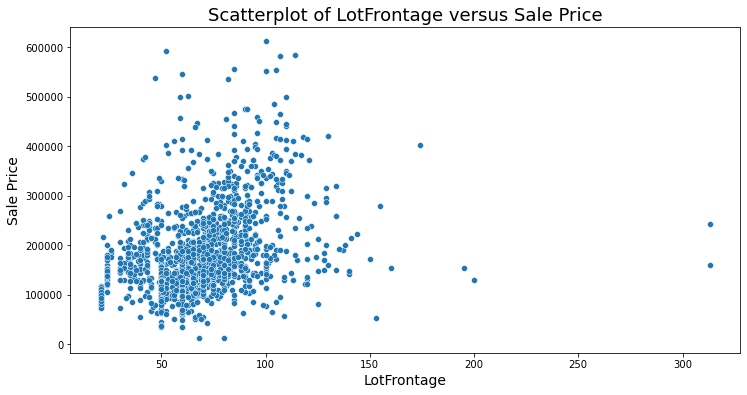

In [23]:
plot_scattter(num_data,'LotFrontage')

In [24]:
train.drop(train[train['LotFrontage'] > 300].index, inplace=True);

#### LotArea
We will drop the outliers that are more than 100,000.

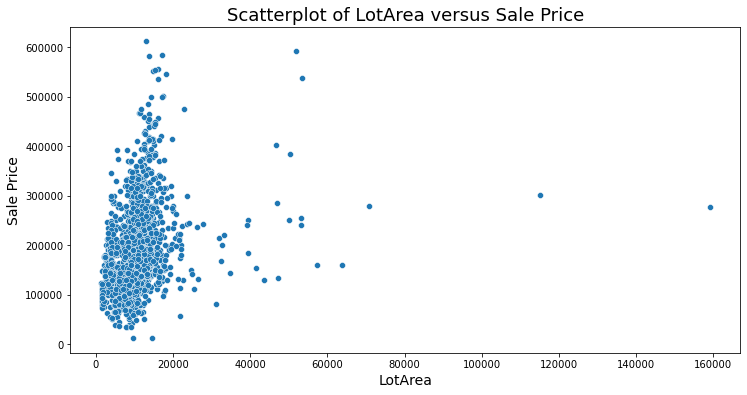

In [25]:
plot_scattter(num_data,'LotArea')

In [26]:
train.drop(train[train['LotArea'] > 100000].index, inplace=True);

#### GrLivArea
GrLivArea: Above grade (ground) living area square feet <br>
We will drop the outlier that is more than 5000.

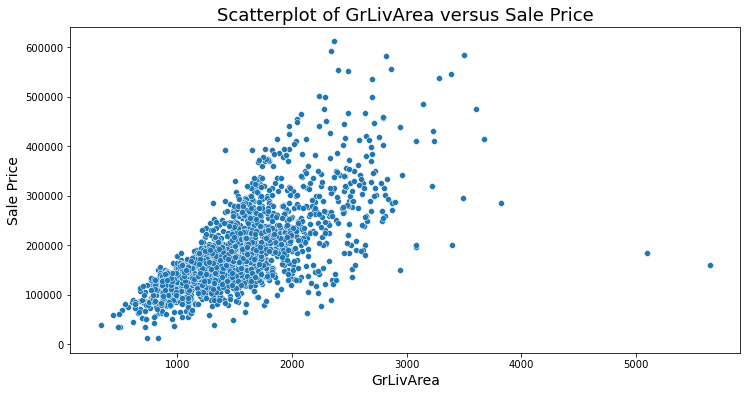

In [27]:
plot_scattter(num_data,'GrLivArea')

In [28]:
train.drop(train[train['GrLivArea'] > 5000].index, inplace=True);

#### GarageYrBlt
GarageYrBlt: Year garage was built<br>
Notice that Year 2207 is not possible thus we will replace with the Year Built 2006

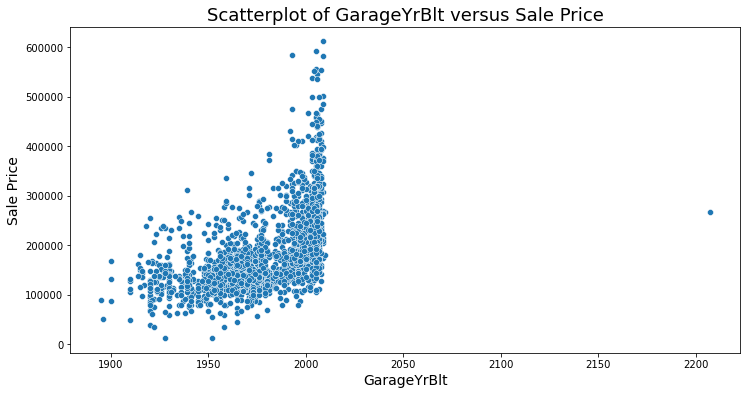

In [29]:
plot_scattter(num_data,'GarageYrBlt')

In [30]:
train.loc[train['GarageYrBlt'] > 2200, ['YearBuilt', 'GarageYrBlt']].head()

,YearBuilt,GarageYrBlt
1699,2006,2207.0


In [31]:
train['GarageYrBlt'].replace({2207: 2006}, inplace=True)

### 1.2.2 Null Values

In [32]:
train.isnull().sum()[train.isnull().sum() > 0].sort_values(ascending=False)

PoolQC          2038
MiscFeature     1983
Alley           1906
Fence           1646
FireplaceQu     1000
LotFrontage      328
GarageYrBlt      114
GarageCond       114
GarageQual       114
GarageFinish     114
GarageType       113
BsmtExposure      58
BsmtFinType2      56
BsmtCond          55
BsmtQual          55
BsmtFinType1      55
MasVnrArea        22
MasVnrType        22
BsmtHalfBath       2
BsmtFullBath       2
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF2         1
GarageCars         1
GarageArea         1
BsmtFinSF1         1
dtype: int64

In [33]:
test.isnull().sum()[test.isnull().sum() > 0].sort_values(ascending=False)

PoolQC          874
MiscFeature     837
Alley           820
Fence           706
FireplaceQu     422
LotFrontage     160
GarageYrBlt      45
GarageFinish     45
GarageQual       45
GarageCond       45
GarageType       44
BsmtExposure     25
BsmtFinType1     25
BsmtFinType2     25
BsmtCond         25
BsmtQual         25
MasVnrArea        1
MasVnrType        1
Electrical        1
dtype: int64

#### Pool Quality
After checking isnull() and notnull() values of PoolQC alongside PoolArea to see if null cell is actually equal to 0 PoolArea, we can move on to fill in the null values for the train set.

##### Train Set

In [34]:
pool_null = train[train.PoolQC.isnull()]
pool_notnull = train[train.PoolQC.notnull()]

pool_notnull.loc[pool_notnull['PoolQC'] != 'NaN', ['PoolQC','PoolArea']]

,PoolQC,PoolArea
52,Fa,519
657,Gd,576
761,Gd,800
952,Ex,228
1130,Fa,648
1249,Gd,738
1635,TA,368
1875,TA,561


In [35]:
pool_null.groupby(['PoolArea'])[['PoolQC']].count()

,PoolQC
PoolArea,
0,0


In [36]:
train['PoolQC'] = train['PoolQC'].fillna('None')
train['PoolQC'] = train['PoolQC'].map({'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

##### Test Set

In [37]:
test['PoolQC'] = test['PoolQC'].fillna('None')
test['PoolQC'] = test['PoolQC'].map({'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

#### Misc Feature
After checking isnull() and notnull() values of MiscFeature alongside MiscVal to see if null cell is actually equal to 0 PoolArea, we can move on to one-hot encode MiscFeature with MiscVal amount.

##### Train Set

In [38]:
misc_null = train[train.MiscFeature.isnull()]
misc_notnull = train[train.MiscFeature.notnull()]

misc_notnull.groupby(['MiscFeature'])[['MiscVal']].mean()

,MiscVal
MiscFeature,
Gar2,7075.000000
Othr,4333.333333
Shed,817.800000
TenC,2000.000000


In [39]:
misc_null.groupby(['MiscVal'])[['MiscFeature']].count()

,MiscFeature
MiscVal,
0,0


In [40]:
train = pd.get_dummies(train, columns=['MiscFeature'])

In [41]:
train.columns[train.columns.str.contains('Misc')]

Index(['MiscVal', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed',
       'MiscFeature_TenC'],
      dtype='object')

In [42]:
misc_col = train[['MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC']]

In [43]:
for (columnName, columnData) in misc_col.iteritems():
    train[columnName] = train[columnName] * train['MiscVal']

In [44]:
train.drop('MiscVal', axis=1, inplace=True)

##### Test Set

In [45]:
test = pd.get_dummies(test, columns=['MiscFeature'])

In [46]:
test.columns[test.columns.str.contains('Misc')]

Index(['MiscVal', 'MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed'], dtype='object')

In [47]:
test[['MiscFeature_TenC']] = 0

In [48]:
misc_col_t = test[['MiscFeature_Gar2', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC']]

In [49]:
for (columnName, columnData) in misc_col_t.iteritems():
    test[columnName] = test[columnName] * test['MiscVal']

In [50]:
test.drop('MiscVal', axis=1, inplace=True)

#### Alley and Fence
Fillna with 'None'. Thereafter, check to see which value has a higher mean SalesPrice, then decide which to assign int base on the higher mean

##### Alley Train Set

<AxesSubplot:xlabel='SalePrice', ylabel='Fence'>

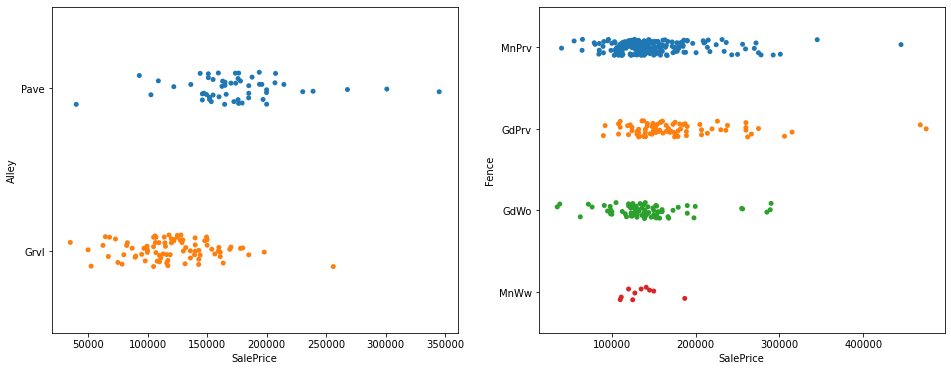

In [51]:
fig, ax = plt.subplots(ncols=2, figsize=(16,6))
ax = ax.ravel()
sns.stripplot(data=train, x='SalePrice', y='Alley', ax=ax[0])
sns.stripplot(data=train, x='SalePrice', y='Fence', ax=ax[1])

In [52]:
train['Alley'] = train['Alley'].fillna('None')

In [53]:
train.groupby(['Alley'])[['SalePrice']].mean().sort_values(by='SalePrice', ascending = False)

,SalePrice
Alley,
None,184238.756558
Pave,174534.709091
Grvl,120835.635294


In [54]:
train['Alley'] = train['Alley'].map({'Grvl':1, 'Pave':2, 'None':3})

##### Alley Test Set

In [55]:
test['Alley'] = test['Alley'].fillna('None')

In [56]:
test['Alley'] = test['Alley'].map({'Grvl':1, 'Pave':2, 'None':3})

##### Fence Train Set

In [57]:
train['Fence'] = train['Fence'].fillna('None')

In [58]:
train.groupby(['Fence'])[['SalePrice']].mean().sort_values(by='SalePrice', ascending = False)

,SalePrice
Fence,
None,188423.874848
GdPrv,176979.855422
MnPrv,147677.969163
GdWo,141499.162500
MnWw,135165.000000


In [59]:
train['Fence'] = train['Fence'].map({'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4, 'None':5})

##### Fence Test Set

In [60]:
test['Fence'] = test['Fence'].fillna('None')

In [61]:
test['Fence'] = test['Fence'].map({'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4, 'None':5})

#### Fireplace Quality
After checking isnull() and notnull() values of FireplaceQu alongside number of Fireplaces to see if null cell is actually equal to 0 Fireplace, we can move on to fill in the null values for the train set.

##### Train Set

In [62]:
train.columns[train.columns.str.contains('Fireplace')]

Index(['Fireplaces', 'FireplaceQu'], dtype='object')

In [63]:
fire_null = train[train.FireplaceQu.isnull()]
fire_notnull = train[train.FireplaceQu.notnull()]

fire_notnull.groupby(['FireplaceQu'])[['Fireplaces']].sum()

,Fireplaces
FireplaceQu,
Ex,33
Fa,70
Gd,595
Po,31
TA,473


In [64]:
fire_null.groupby(['Fireplaces'])[['FireplaceQu']].count()

,FireplaceQu
Fireplaces,
0,0


In [65]:
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

In [66]:
train.groupby(['FireplaceQu'])[['SalePrice']].mean().sort_values(by='SalePrice', ascending = False)

,SalePrice
FireplaceQu,
Ex,331481.483871
Gd,233799.321154
TA,204475.812346
Fa,170287.203390
None,142001.103000
Po,139263.967742


In [67]:
train['FireplaceQu'] = train['FireplaceQu'].map({'Po':-1, 'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

##### Test Set

In [68]:
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

In [69]:
test['FireplaceQu'] = test['FireplaceQu'].map({'Po':-1, 'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

#### Lot Frontage
We need to fill in null value with mean of LotConfig and LotShape.

In [70]:
train.columns[train.columns.str.contains('Lot')]

Index(['LotFrontage', 'LotArea', 'LotShape', 'LotConfig'], dtype='object')

In [71]:
lot_group = train[['LotFrontage', 'LotArea', 'LotShape', 'LotConfig']]
lot_group_t = test[['LotFrontage', 'LotArea', 'LotShape', 'LotConfig']]

In [72]:
lot_group_ttl = pd.concat(objs = [lot_group, lot_group_t], axis = 0)

In [73]:
lot_group_ttl = lot_group_ttl.groupby(['LotShape','LotConfig']).mean()
lot_group_ttl

LotFrontage       LotArea
LotShape LotConfig                           
IR1      Corner       93.661290  12353.588832
         CulDSac      56.985714  13295.891156
         FR2          72.615385  13266.600000
         FR3          87.500000  10364.857143
         Inside       72.049887  10698.875208
IR2      Corner       96.000000  14732.307692
         CulDSac      49.888889  17737.920000
         FR2          41.333333  14519.888889
         Inside       75.523810  14228.730769
IR3      Corner      119.333333  11558.800000
         CulDSac     113.500000  23747.333333
         Inside       79.200000  45729.142857
Reg      Corner       76.454874   9471.444068
         CulDSac      33.000000   8198.000000
         FR2          60.673913   8594.392157
         FR3          73.833333  10632.857143
         Inside       65.164756   8749.033267

##### Train Set

In [74]:
lot_group_null = lot_group[lot_group.LotFrontage.isnull()]

In [75]:
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 93.7 if (x[2] == 'IR1') & 
                                                     (x[3] == 'Corner') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 57.0 if (x[2] == 'IR1') & 
                                                     (x[3] == 'CulDSac') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 72.6 if (x[2] == 'IR1') & 
                                                     (x[3] == 'FR2') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 87.5 if (x[2] == 'IR1') & 
                                                     (x[3] == 'FR3') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 72.0 if (x[2] == 'IR1') & 
                                                     (x[3] == 'Inside') else x[0], axis=1)

In [76]:
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 96.0 if (x[2] == 'IR2') & 
                                                     (x[3] == 'Corner') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 49.9 if (x[2] == 'IR2') & 
                                                     (x[3] == 'CulDSac') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 41.3 if (x[2] == 'IR2') & 
                                                     (x[3] == 'FR2') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 75.5 if (x[2] == 'IR2') & 
                                                     (x[3] == 'Inside') else x[0], axis=1)

In [77]:
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 119.3 if (x[2] == 'IR3') & 
                                                     (x[3] == 'Corner') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 113.5 if (x[2] == 'IR3') & 
                                                     (x[3] == 'CulDSac') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 79.2 if (x[2] == 'IR3') & 
                                                     (x[3] == 'Inside') else x[0], axis=1)

In [78]:
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 76.5 if (x[2] == 'Reg') & 
                                                     (x[3] == 'Corner') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 33.0 if (x[2] == 'Reg') & 
                                                     (x[3] == 'CulDSac') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 60.7 if (x[2] == 'Reg') & 
                                                     (x[3] == 'FR2') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 73.8 if (x[2] == 'Reg') & 
                                                     (x[3] == 'FR3') else x[0], axis=1)
lot_group_null['LotFrontage'] = lot_group_null.apply(lambda x: 65.2 if (x[2] == 'Reg') & 
                                                     (x[3] == 'Inside') else x[0], axis=1)

In [79]:
train.loc[train.LotFrontage.isnull(), 'LotFrontage'] = lot_group_null.LotFrontage

##### Test Set

In [80]:
lot_group_t_null = lot_group_t[lot_group_t.LotFrontage.isnull()]

In [81]:
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 93.7 if (x[2] == 'IR1') & 
                                                         (x[3] == 'Corner') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 57.0 if (x[2] == 'IR1') & 
                                                         (x[3] == 'CulDSac') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 72.6 if (x[2] == 'IR1') & 
                                                         (x[3] == 'FR2') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 87.5 if (x[2] == 'IR1') & 
                                                         (x[3] == 'FR3') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 72.0 if (x[2] == 'IR1') & 
                                                         (x[3] == 'Inside') else x[0], axis=1)

In [82]:
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 96.0 if (x[2] == 'IR2') & 
                                                         (x[3] == 'Corner') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 49.9 if (x[2] == 'IR2') & 
                                                         (x[3] == 'CulDSac') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 41.3 if (x[2] == 'IR2') & 
                                                         (x[3] == 'FR2') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 75.5 if (x[2] == 'IR2') & 
                                                         (x[3] == 'Inside') else x[0], axis=1)

In [83]:
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 119.3 if (x[2] == 'IR3') & 
                                                         (x[3] == 'Corner') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 113.5 if (x[2] == 'IR3') & 
                                                         (x[3] == 'CulDSac') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 79.2 if (x[2] == 'IR3') & 
                                                         (x[3] == 'Inside') else x[0], axis=1)

In [84]:
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 76.5 if (x[2] == 'Reg') & 
                                                         (x[3] == 'Corner') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 33.0 if (x[2] == 'Reg') & 
                                                         (x[3] == 'CulDSac') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 60.7 if (x[2] == 'Reg') & 
                                                         (x[3] == 'FR2') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 73.8 if (x[2] == 'Reg') & 
                                                         (x[3] == 'FR3') else x[0], axis=1)
lot_group_t_null['LotFrontage'] = lot_group_t_null.apply(lambda x: 65.2 if (x[2] == 'Reg') & 
                                                         (x[3] == 'Inside') else x[0], axis=1)

In [85]:
test.loc[test.LotFrontage.isnull(), 'LotFrontage'] = lot_group_t_null.LotFrontage

#### Garages 
Full the null value summary, we see that there are 114 null values for GarageYrBlt, GarageFinish, GarageQual and GarageCond but there is only 113 null values for GarageType. We need to check and determine if its an error before filling in the null values.
- GarageYrBlt      114
- GarageCond       114
- GarageQual       114
- GarageFinish     114
- GarageType       113
- GarageCars         1
- GarageArea         1

##### Train Set

In [86]:
train.columns[train.columns.str.contains('Garage')]

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [87]:
garage_group = train[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
garage_group[garage_group.GarageYrBlt.isnull()].sort_values(by = 'GarageType', ascending = True).head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
1712,Detchd,NaN,NaN,NaN,NaN,NaN,NaN
28,NaN,NaN,NaN,0.0,0.0,NaN,NaN
53,NaN,NaN,NaN,0.0,0.0,NaN,NaN
65,NaN,NaN,NaN,0.0,0.0,NaN,NaN
79,NaN,NaN,NaN,0.0,0.0,NaN,NaN


In [88]:
train['GarageType'] = train['GarageType'].fillna('None')
train['GarageFinish'] = train['GarageFinish'].fillna('None')
train['GarageQual'] = train['GarageQual'].fillna('None')
train['GarageCond'] = train['GarageCond'].fillna('None')
train['GarageCars'] = train['GarageCars'].fillna(0)
train['GarageArea'] = train['GarageArea'].fillna(0)

In [89]:
train.loc[1712:1712,'GarageType'] = 'None'

In [90]:
train['GarageFinish'] = train['GarageFinish'].map({'None':0, 'Unf':1, 'RFn':2, 'Fin':3})
train['GarageQual'] = train['GarageQual'].map({'Po':-1, 'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
train['GarageCond'] = train['GarageCond'].map({'Po':-1, 'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [91]:
train = pd.get_dummies(train, columns=['GarageType'])

In [92]:
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['YearBuilt'])

In [93]:
train['GarageYrBltDiff'] = train['GarageYrBlt'] - train['YearBuilt']

In [94]:
train.drop('GarageYrBlt', axis=1, inplace=True)

##### Test Set
- GarageYrBlt      45
- GarageFinish     45
- GarageQual       45
- GarageCond       45
- GarageType       44

In [95]:
garage_group_t = test[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]
garage_group_t[garage_group_t.GarageYrBlt.isnull()].sort_values(by = 'GarageType', ascending = True).head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
764,Detchd,NaN,NaN,1,360,NaN,NaN
29,NaN,NaN,NaN,0,0,NaN,NaN
45,NaN,NaN,NaN,0,0,NaN,NaN
66,NaN,NaN,NaN,0,0,NaN,NaN
68,NaN,NaN,NaN,0,0,NaN,NaN


In [96]:
garage_group_t1 = garage_group_t[(garage_group_t['GarageCars'] == 1)]
garage_group_t1.groupby(['GarageFinish','GarageQual','GarageCond']).mean().sort_values(by = 
                                                                                       'GarageArea', ascending = True)

GarageYrBlt  GarageCars  GarageArea
GarageFinish GarageQual GarageCond                                     
Unf          Po         Fa          1910.000000         1.0  195.000000
             Fa         Fa          1928.555556         1.0  220.000000
                        Po          1927.666667         1.0  230.000000
                        TA          1936.200000         1.0  268.733333
             TA         Fa          1933.875000         1.0  272.500000
RFn          TA         TA          1963.055556         1.0  316.333333
Unf          TA         TA          1956.127389         1.0  318.808917
             Po         Po          1918.000000         1.0  320.000000
Fin          TA         TA          1963.350000         1.0  329.600000
RFn          Fa         TA          1920.000000         1.0  355.000000
Unf          TA         Gd          1997.000000         1.0  440.000000

In [97]:
test.loc[764:764,'GarageFinish'] = 'RFn'
test.loc[764:764,'GarageQual'] = 'Fa'
test.loc[764:764,'GarageCond'] = 'TA'

In [98]:
test['GarageType'] = test['GarageType'].fillna('None')
test['GarageFinish'] = test['GarageFinish'].fillna('None')
test['GarageQual'] = test['GarageQual'].fillna('None')
test['GarageCond'] = test['GarageCond'].fillna('None')

In [99]:
test['GarageFinish'] = test['GarageFinish'].map({'None':0, 'Unf':1, 'RFn':2, 'Fin':3})
test['GarageQual'] = test['GarageQual'].map({'Po':-1, 'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test['GarageCond'] = test['GarageCond'].map({'Po':-1, 'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [100]:
test = pd.get_dummies(test, columns=['GarageType'])

In [101]:
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['YearBuilt'])

In [102]:
test['GarageYrBltDiff'] = test['GarageYrBlt'] - test['YearBuilt']

In [103]:
test.drop('GarageYrBlt', axis=1, inplace=True)

#### Basement 
Similar to Garage there are also variance in Basement features. We need to check and determine if its an error before filling in the null values.
- BsmtExposure      58
- BsmtFinType2      56
- BsmtCond          55
- BsmtQual          55
- BsmtFinType1      55
- BsmtHalfBath       2
- BsmtFullBath       2
- TotalBsmtSF        1
- BsmtUnfSF          1
- BsmtFinSF2         1
- BsmtFinSF1         1

##### Train Set

In [104]:
train.columns[train.columns.str.contains('Bsmt')]

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [105]:
bsmt_group = train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 
                    'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']]
bsmt_group[bsmt_group.BsmtFullBath.isnull()].sort_values(by = 'TotalBsmtSF', ascending = False).head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
616,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,NaN,NaN
1327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
train.loc[1327:1327,['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']] = 0

In [107]:
bsmt_group[bsmt_group.BsmtExposure.isnull()].sort_values(by = 'BsmtCond', ascending = False).head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
1456,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


In [108]:
train['BsmtQual'] = train['BsmtQual'].fillna('None')
train['BsmtCond'] = train['BsmtCond'].fillna('None')
train['BsmtExposure'] = train['BsmtExposure'].fillna('None')
train['BsmtFinType1'] = train['BsmtFinType1'].fillna('None')
train['BsmtFinType2'] = train['BsmtFinType2'].fillna('None')
train['BsmtFullBath'] = train['BsmtFullBath'].fillna(0)
train['BsmtHalfBath'] = train['BsmtHalfBath'].fillna(0)

In [109]:
train[['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF']].sort_values('BsmtFinSF2', ascending=False).head()

,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF
770,28.0,1474.0,1502.0,0.0
1692,292.0,1393.0,1733.0,48.0
793,144.0,1127.0,1650.0,379.0
1313,368.0,1120.0,1488.0,0.0
1174,306.0,1085.0,1763.0,372.0


'TotalBsmtSF' is the sum of 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'. Thus we can add 'BsmtFinSF1' and 'BsmtFinSF2' to find out total finish basement area

In [110]:
train['BsmtLivArea'] = train['BsmtFinSF1'] + train['BsmtFinSF2']

In [111]:
train.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

In [112]:
train[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,TA,TA,No,GLQ,Unf
1,Gd,TA,No,GLQ,Unf
2,TA,TA,No,GLQ,Unf
3,Gd,TA,No,Unf,Unf
4,Fa,Gd,No,Unf,Unf


In [113]:
train['BsmtQual'] = train['BsmtQual'].map({'Po':-1, 'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
train['BsmtCond'] = train['BsmtCond'].map({'Po':-1, 'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
train['BsmtExposure'] = train['BsmtExposure'].map({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
train['BsmtFinType1'] = train['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
train['BsmtFinType2'] = train['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [114]:
train['BsmtFin'] = train['BsmtFinType1'] + train['BsmtFinType2']

In [115]:
train.drop(['BsmtFinType1', 'BsmtFinType2'], axis=1, inplace=True)

##### Test Set
- BsmtExposure     25
- BsmtFinType1     25
- BsmtFinType2     25
- BsmtCond         25
- BsmtQual         25

In [116]:
test['BsmtQual'] = test['BsmtQual'].fillna('None')
test['BsmtCond'] = test['BsmtCond'].fillna('None')
test['BsmtExposure'] = test['BsmtExposure'].fillna('None')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('None')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('None')

In [117]:
test[['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF']].sort_values('BsmtFinSF2', ascending=False).head()

,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,BsmtUnfSF
65,236,1526,2024,262
172,612,1164,1776,0
182,125,1031,1192,36
141,49,1029,1078,0
72,540,1020,1560,0


In [118]:
test['BsmtLivArea'] = test['BsmtFinSF1'] + test['BsmtFinSF2']

In [119]:
test.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF'], axis=1, inplace=True)

In [120]:
test[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']].head()

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
0,Fa,TA,No,Unf,Unf
1,Gd,TA,No,Unf,Unf
2,Gd,Gd,Av,GLQ,Unf
3,TA,TA,No,Unf,Unf
4,Gd,TA,No,BLQ,Unf


In [121]:
test['BsmtQual'] = test['BsmtQual'].map({'Po':-1, 'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test['BsmtCond'] = test['BsmtCond'].map({'Po':-1, 'None':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test['BsmtExposure'] = test['BsmtExposure'].map({'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
test['BsmtFinType1'] = test['BsmtFinType1'].map({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
test['BsmtFinType2'] = test['BsmtFinType2'].map({'None':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})

In [122]:
test['BsmtFin'] = test['BsmtFinType1'] + test['BsmtFinType2']

In [123]:
test.drop(['BsmtFinType1', 'BsmtFinType2'], axis=1, inplace=True)

#### Masonry Veneer
After checking isnull() and notnull() values of MasVnrType and MasVnrArea to see if null cell is actually equal to 0, we can move on to fill in the null values for the train set.

##### Train Set

In [124]:
MasVnr_null = train[train.MasVnrType.isnull()]
MasVnr_notnull = train[train.MasVnrType.notnull()]

MasVnr_null.loc[MasVnr_null['MasVnrType'] != 'NaN', ['MasVnrType','MasVnrArea']].head()

,MasVnrType,MasVnrArea
22,NaN,NaN
41,NaN,NaN
86,NaN,NaN
212,NaN,NaN
276,NaN,NaN


In [125]:
train.loc[train['MasVnrType'] == 'None', ['MasVnrArea','MasVnrType']].sort_values(by='MasVnrArea',ascending=False).head()

,MasVnrArea,MasVnrType
1832,344.0,None
810,288.0,None
1684,1.0,None
765,1.0,None
1148,1.0,None


In [126]:
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

In [127]:
def insert_col(df, col_name, row):
    df[[col_name]] = 0
    last_column = df.pop(col_name)
    df.insert(row, col_name, last_column)

In [128]:
train = pd.get_dummies(train, columns=['MasVnrType'])

In [129]:
insert_col(train, 'MasVnrType_CBlock', 87)

##### Test Set

In [130]:
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

In [131]:
test = pd.get_dummies(test, columns=['MasVnrType'])

#### Electrical
After checking isnull() values of Electrical not meant to NaN by using Neighborhood, Utilities, Heating, HeatingQC, CentralAir feature to check. Using the same feature to see which value to fill in.

##### Test Set

In [132]:
utili_group = test[['Neighborhood','Utilities', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical']]

In [133]:
utili_group[utili_group.Electrical.isnull()].sort_values(by = 'Electrical', ascending = False)

,Neighborhood,Utilities,Heating,HeatingQC,CentralAir,Electrical
634,Timber,AllPub,GasA,Gd,Y,NaN


In [134]:
utili_group_t1 = utili_group[(utili_group['Neighborhood'] == 'Timber')]
utili_group_t1.groupby(['Neighborhood','Utilities','Heating','HeatingQC',
                        'Electrical']).count().sort_values(by = 'Electrical', ascending = True)

CentralAir
Neighborhood Utilities Heating HeatingQC Electrical            
Timber       AllPub    GasA    Ex        SBrkr               17
                               Gd        SBrkr                3
                               TA        SBrkr                2
                       GasW    TA        SBrkr                1

In [135]:
test['Electrical'] = test['Electrical'].fillna('SBrkr')

### 1.2.3 Encoding Remaining Categorical Features

In [136]:
train.select_dtypes(include='object').head().T

,0,1,2,3,4
MSZoning,RL,RL,RL,RL,RL
Street,Pave,Pave,Pave,Pave,Pave
LotShape,IR1,IR1,Reg,Reg,IR1
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub
LotConfig,CulDSac,CulDSac,Inside,Inside,Inside
LandSlope,Gtl,Gtl,Gtl,Gtl,Gtl
Neighborhood,Sawyer,SawyerW,NAmes,Timber,SawyerW
Condition1,RRAe,Norm,Norm,Norm,Norm
Condition2,Norm,Norm,Norm,Norm,Norm


#### MSZoning

In [137]:
train = pd.get_dummies(train, columns=['MSZoning'])
test = pd.get_dummies(test, columns=['MSZoning'])

In [138]:
train.columns = train.columns.str.replace('[\(\)]', '')
test.columns = test.columns.str.replace('[\(\)]', '')

In [139]:
train.columns = train.columns.str.replace(' ', '_')
test.columns = test.columns.str.replace(' ', '_')

In [140]:
insert_col(test, 'MSZoning_A_agr', 88)

#### Street

In [141]:
train = pd.get_dummies(train, columns=['Street'])
test = pd.get_dummies(test, columns=['Street'])

#### LotShape, LotConfig

In [142]:
train = pd.get_dummies(train, columns=['LotShape'])
test = pd.get_dummies(test, columns=['LotShape'])

In [143]:
train = pd.get_dummies(train, columns=['LotConfig'])
test = pd.get_dummies(test, columns=['LotConfig'])

#### LandContour, LandSlope

In [144]:
train = pd.get_dummies(train, columns=['LandContour'])
test = pd.get_dummies(test, columns=['LandContour'])

In [145]:
train = pd.get_dummies(train, columns=['LandSlope'])
test = pd.get_dummies(test, columns=['LandSlope'])

#### Utilities, Heating, HeatingQC, CentralAir, Electrical

In [146]:
train = pd.get_dummies(train, columns=['Utilities'])
test = pd.get_dummies(test, columns=['Utilities'])

In [147]:
insert_col(test, 'Utilities_NoSeWa', 108)

In [148]:
train = pd.get_dummies(train, columns=['Heating'])
test = pd.get_dummies(test, columns=['Heating'])

In [149]:
insert_col(train, 'Heating_Floor', 110)
test[['Heating_OthW','Heating_Wall']] = 0

In [150]:
train['HeatingQC'] = train['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test['HeatingQC'] = test['HeatingQC'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

In [151]:
train['CentralAir'] = train['CentralAir'].map({'N':0, 'Y':1})
test['CentralAir'] = test['CentralAir'].map({'N':0, 'Y':1})

In [152]:
train['Electrical'] = train['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':1, 'FuseA':1, 'SBrkr':2})
test['Electrical'] = test['Electrical'].map({'Mix':0, 'FuseP':1, 'FuseF':1, 'FuseA':1, 'SBrkr':2})

#### Condition1, Condition2

In [153]:
train['Condition1'] = train['Condition1'].map({'Artery':-1, 'Feedr':-1, 'Norm':0, 'RRNn':0, 'RRAn':0, 'RRNe':0, 
                                               'RRAe':0, 'PosN':1, 'PosA':1})
test['Condition1'] = test['Condition1'].map({'Artery':-1, 'Feedr':-1, 'Norm':0, 'RRNn':0, 'RRAn':0, 'RRNe':0, 
                                             'RRAe':0, 'PosN':1, 'PosA':1})
train['Condition2'] = train['Condition2'].map({'Artery':-1, 'Feedr':-1, 'Norm':0, 'RRNn':0, 'RRAn':0, 'RRNe':0, 
                                               'RRAe':0, 'PosN':1, 'PosA':1})
test['Condition2'] = test['Condition2'].map({'Artery':-1, 'Feedr':-1, 'Norm':0, 'RRNn':0, 'RRAn':0, 'RRNe':0, 
                                             'RRAe':0, 'PosN':1, 'PosA':1})

In [154]:
train['Condition'] = train['Condition1'] + train['Condition2']
test['Condition'] = test['Condition1'] + test['Condition2']

In [155]:
train.drop(['Condition1','Condition2'], axis=1, inplace=True)
test.drop(['Condition1','Condition2'], axis=1, inplace=True)

#### BldgType, HouseStyle

In [156]:
train = pd.get_dummies(train, columns=['BldgType'])
test = pd.get_dummies(test, columns=['BldgType'])

In [158]:
train.groupby(['HouseStyle'])[['SalePrice']].mean().sort_values(by='SalePrice', ascending = False)

,SalePrice
HouseStyle,
2.5Fin,243666.666667
2Story,206486.700168
2.5Unf,191785.714286
1Story,179630.764205
SLvl,166248.989362
SFoyer,149343.920000
1.5Fin,135832.534562
1.5Unf,112466.666667


In [159]:
train['HouseStyle'] = train['HouseStyle'].str.replace('2.5Unf', '2Story')
train['HouseStyle'] = train['HouseStyle'].str.replace('1.5Fin', '1.5Story')
train['HouseStyle'] = train['HouseStyle'].str.replace('1.5Unf', '1.5Story')
test['HouseStyle'] = test['HouseStyle'].str.replace('2.5Unf', '2Story')
test['HouseStyle'] = test['HouseStyle'].str.replace('1.5Fin', '1.5Story')
test['HouseStyle'] = test['HouseStyle'].str.replace('1.5Unf', '1.5Story')

In [160]:
train = pd.get_dummies(train, columns=['HouseStyle'])
test = pd.get_dummies(test, columns=['HouseStyle'])

#### RoofStyle, RoofMatl

In [161]:
train = pd.get_dummies(train, columns=['RoofStyle'])
test = pd.get_dummies(test, columns=['RoofStyle'])

In [162]:
train = pd.get_dummies(train, columns=['RoofMatl'])
test = pd.get_dummies(test, columns=['RoofMatl'])

In [163]:
insert_col(train, 'RoofMatl_Metal', 130)
insert_col(test, 'RoofMatl_Membran', 128)
insert_col(train, 'RoofMatl_Roll', 131)

#### Exterior1st, Exterior2nd, ExterQual, ExterCond

In [164]:
train = pd.get_dummies(train, columns=['Exterior1st'])
test = pd.get_dummies(test, columns=['Exterior1st'])

In [165]:
insert_col(test, 'Exterior1st_CBlock', 137)
insert_col(test, 'Exterior1st_ImStucc', 140)
insert_col(train, 'Exterior1st_PreCast', 144)
insert_col(test, 'Exterior1st_Stone', 144)

In [166]:
train = pd.get_dummies(train, columns=['Exterior2nd'])
test = pd.get_dummies(test, columns=['Exterior2nd'])

In [167]:
insert_col(train, 'Exterior2nd_Other', 158)
insert_col(train, 'Exterior2nd_PreCast', 160)
insert_col(test, 'Exterior2nd_Stone', 160)

In [168]:
train['ExterQual'] = train['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test['ExterQual'] = test['ExterQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
train['ExterCond'] = train['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test['ExterCond'] = test['ExterCond'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

#### Foundation

In [169]:
train = pd.get_dummies(train, columns=['Foundation'])
test = pd.get_dummies(test, columns=['Foundation'])

#### KitchenQual

In [170]:
train['KitchenQual'] = train['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
test['KitchenQual'] = test['KitchenQual'].map({'Po':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})

#### Functional

In [171]:
train['Functional'] = train['Functional'].map({'Sal':-2, 'Sev':-2, 'Maj2':-1, 'Maj1':-1, 'Mod':0, 'Min2':0, 'Min1':0, 
                                               'Typ':1})
test['Functional'] = test['Functional'].map({'Sal':-2, 'Sev':-2, 'Maj2':-1, 'Maj1':-1, 'Mod':0, 'Min2':0, 'Min1':0, 
                                             'Typ':1})

#### PavedDrive

In [172]:
train['PavedDrive'] = train['PavedDrive'].map({'N':0, 'P':1, 'Y':2})

#### SaleType

In [173]:
train = pd.get_dummies(train, columns=['SaleType'])
test = pd.get_dummies(test, columns=['SaleType'])

In [174]:
insert_col(train, 'SaleType_VWD', 178)

In [175]:
train.columns = train.columns.str.replace(' ', '')
test.columns = test.columns.str.replace(' ', '')

#### Neighborhood

In [176]:
train = pd.get_dummies(train, columns=['Neighborhood'])
test = pd.get_dummies(test, columns=['Neighborhood'])

In [177]:
insert_col(test, 'Neighborhood_GrnHill', 188)
insert_col(test, 'Neighborhood_Landmrk', 190)

#### MSSubClass
MSSubClass: The building class<br>
Though the values for building class is in numerical values, but they don't necessarily have same weightage to sales price, thus it is better to treat the same way as neighborhood. We will also encode MSSubClass. 

In [178]:
train.groupby(['MSSubClass'])[['SalePrice']].mean().sort_values(by='SalePrice', ascending = False)

,SalePrice
MSSubClass,
60,239427.361323
120,211813.613636
75,204875.000000
20,189096.970013
80,169569.825581
85,154398.214286
70,153354.455556
150,148400.000000
90,139296.333333


In [179]:
train = pd.get_dummies(train, columns=['MSSubClass'])
test = pd.get_dummies(test, columns=['MSSubClass'])

In [180]:
insert_col(test, 'MSSubClass_150', 217)

### 1.2.4 Saving Cleaned Dataset

Final check on the cleaned datatset before saving it to csv

In [181]:
train.isnull().sum()[train.isnull().sum() > 0], test.isnull().sum()[test.isnull().sum() > 0]

(Series([], dtype: int64), Series([], dtype: int64))

In [182]:
train.shape, test.shape

((2046, 222), (878, 221))

In [ ]:
train.to_csv('../datasets/train_clean.csv', index=False)

In [ ]:
test.to_csv('../datasets/test_clean.csv', index=False)